In [29]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.io as sio
from scipy import signal
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, GlobalAveragePooling1D, Dropout
from keras.optimizers import Adam
import os
from sklearn.model_selection import train_test_split
import shutil
import csv
import re
import random
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns


In [4]:
fs_original = 1000.0
fs_new = 100.0
f0 = 50.0  
Q = 30.0  
w0 = f0/(fs_new/2)  
lowcut = 2.0  
highcut = 40.0  
nyquist = 0.5 * fs_new
low = lowcut / nyquist
high = highcut / nyquist

In [5]:

# Filter and Resample data
data_folder = "/Users/evanxiang/Desktop/ML Testing/OriginalECG"
for file_name in os.listdir(data_folder):
    if file_name.endswith(".mat"):
        file_path = os.path.join(data_folder, file_name)
        mat = sio.loadmat(file_path)
        y = mat['val']
        num_points_original = y.shape[1]
        num_points_new = int(num_points_original * fs_new / fs_original)
     
        y_resampled = signal.resample(y, num_points_new, axis=1)

        y_normalized = 2 * ((y_resampled - np.min(y_resampled, axis=1, keepdims=True)) / 
                    (np.max(y_resampled, axis=1, keepdims=True) - np.min(y_resampled, axis=1, keepdims=True))) - 1

        b, a = signal.iirnotch(w0, Q)
        y_notched = signal.filtfilt(b, a, y_normalized)

        b, a = signal.butter(1, [low, high], btype='band')
        y_filtered = signal.lfilter(b, a, y_notched, axis=1)

        new_file_name = file_name.replace(".mat", "_modified.mat")
        modified_folder_path = "/Users/evanxiang/Desktop/ML Testing/ModifiedECG"
        os.makedirs(modified_folder_path, exist_ok=True)  # Create the directory if it doesn't exist

        new_file_path = os.path.join(modified_folder_path, new_file_name)
        sio.savemat(new_file_path, {'val': y_filtered})



/var/folders/f7/bxkwj7h15x3g3s7z82vh9gnr0000gn/T/ipykernel_29748/72012467.py:13: RuntimeWarning: invalid value encountered in divide
  y_normalized = 2 * ((y_resampled - np.min(y_resampled, axis=1, keepdims=True)) /


In [6]:
# List the associated disease with each SNOMED code
data_folder = "/Users/evanxiang/Desktop/ML Testing/ModifiedECG"
hea_folder = "/Users/evanxiang/Desktop/ML Testing/OriginalECG"
csv_file_path = "/Users/evanxiang/Desktop/ML Testing/SNOMED_mappings_unscored.csv"
snomed_folder_path = "/Users/evanxiang/Desktop/ML Testing/SNOMED"
snomed_dict = {}
try:
    with open(csv_file_path, 'r') as file:
        reader = csv.reader(file, delimiter=';')  
        next(reader)  
        for row in reader:
            snomed_code = row[1]
            disorder_name = row[0]
            snomed_dict[snomed_code] = disorder_name
except FileNotFoundError:
    print(f"Error: CSV file '{csv_file_path}' not found.")

print(snomed_dict)



{'195042002': '2nd degree av block', '164951009': 'abnormal QRS', '426664006': 'accelerated junctional rhythm', '57054005': 'acute myocardial infarction', '413444003': 'acute myocardial ischemia', '426434006': 'anterior ischemia', '54329005': 'anterior myocardial infarction', '251173003': 'atrial bigeminy', '195080001': 'atrial fibrillation and flutter', '195126007': 'atrial hypertrophy', '251268003': 'atrial pacing pattern', '713422000': 'atrial tachycardia', '29320008': 'atrioventricular junctional rhythm', '233917008': 'av block', '251170000': 'blocked premature atrial contraction', '74615001': 'brady tachy syndrome', '6374002': 'bundle branch block', '698247007': 'cardiac dysrhythmia', '426749004': 'chronic atrial fibrillation', '413844008': 'chronic myocardial ischemia', '27885002': 'complete heart block', '204384007': 'congenital incomplete atrioventricular heart block', '53741008': 'coronary heart disease', '77867006': 'decreased qt interval', '82226007': 'diffuse intraventricul

In [7]:

ecg_diagnosis_dict = {}
for file_name in os.listdir(hea_folder):
    if file_name.endswith(".hea"):
        print("ping")
        file_path = os.path.join(hea_folder, file_name)
        if os.path.exists(file_path):
            with open(file_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    if line.startswith("#Dx:"):
                        diagnosis = line.strip().split(":")[1].strip()
                        ecg_diagnosis_dict[file_name] = diagnosis
                        print("yes")
                        break
        else:
            print(f"Error: File '{file_path}' not found.")
print(ecg_diagnosis_dict)



ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
ping
yes
p

In [8]:
folder_path = "/Users/evanxiang/Desktop/ML Testing/OriginalECG"
extracted_data = []
file_names = [file_name for file_name in os.listdir(folder_path) if file_name.endswith(".hea")]
file_names.sort(key=lambda x: int(re.findall(r'\d+', x)[0]))

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("#Dx"):
                file_name = file_name.replace(".hea", "")
                dx_value = line.strip().split(":")[1].strip()
                extracted_data.append((file_name, dx_value))

csv_file_path = "/Users/evanxiang/Desktop/ML Testing/ML.csv"

with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["File Name", "Dx Value"])
    writer.writerows(extracted_data)




In [26]:
# Change the hea files, so the #Dx: line contains the disease name instead of the SNOMED code
hea_folder = "/Users/evanxiang/Desktop/ML Testing/OriginalECG"
data_folder = "/Users/evanxiang/Desktop/ML Testing/ModifiedECG"
csv_file_path = "/Users/evanxiang/Desktop/ML Testing/SNOMED_mappings_unscored.csv"
try:
    with open(csv_file_path, 'r') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader)
        for row in reader:
            snomed_code = row[1].strip('"')
            disorder_names = [name.strip() for name in row[0].split(',')]
            for disorder_name in disorder_names:
                snomed_dict[snomed_code] = disorder_name
except FileNotFoundError:
    print(f"Error: CSV file '{csv_file_path}' not found.")

for file_name in os.listdir(hea_folder):
    if file_name.endswith(".hea"):
        file_path = os.path.join(hea_folder, file_name)
        if os.path.exists(file_path):
            with open(file_path, 'r') as f:
                lines = f.readlines()
            with open(file_path, 'w') as f:
                for line in lines:
                    if line.startswith("#Dx:"):
                        codes = line.strip().split(":")[1].strip().split(',')
                        diseases = [snomed_dict.get(code.strip(), "Unknown") for code in codes]
                        line = "#Dx: " + ", ".join(diseases) + "\n"
                    f.write(line)
        else:
            print(f"Error: File '{file_path}' not found.")




In [9]:
# Iterate over the files in the data folder and sort anything with our specific diagnosis to the split folder
specific_diagnosis = {"st interval abnormal", "st elevation", "st depression", "nonspecific st t abnormality", "myocardial ischemia"}
splitting_folder = "/Users/evanxiang/Desktop/ML Testing/SplittingFolder"

if not os.path.exists(splitting_folder):
    os.makedirs(splitting_folder)
                
for file_name in os.listdir(hea_folder):
    if file_name.endswith(".hea"):
        file_path = os.path.join(hea_folder, file_name)
        mat_file_name = file_name.replace(".hea", "_modified.mat")
        mat_file_path = os.path.join(data_folder, mat_file_name)
        with open(file_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                if line.startswith("#Dx:"):
                    diagnosis = line.strip().split(":")[1].strip()
                    if diagnosis in specific_diagnosis:
                        if os.path.exists(mat_file_path):
                            shutil.move(mat_file_path, os.path.join(splitting_folder, mat_file_name))





In [10]:
# split
splitting_folder = "/Users/evanxiang/Desktop/ML Testing/SplittingFolder"
train_folder = "/Users/evanxiang/Desktop/ML Testing/TrainFolder"
test_folder = "/Users/evanxiang/Desktop/ML Testing/TestFolder"

if not os.path.exists(train_folder):
    os.makedirs(train_folder)
if not os.path.exists(test_folder):
    os.makedirs(test_folder)

file_names = [file_name for file_name in os.listdir(splitting_folder) if file_name.endswith((".hea", ".mat"))]
train_files, test_files = train_test_split(file_names, test_size=0.2, random_state=42)

for file_name in train_files:
    src_file_path = os.path.join(splitting_folder, file_name)
    dst_file_path = os.path.join(train_folder, file_name)
    shutil.move(src_file_path, dst_file_path)

for file_name in test_files:
    src_file_path = os.path.join(splitting_folder, file_name)
    dst_file_path = os.path.join(test_folder, file_name)
    shutil.move(src_file_path, dst_file_path)




ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [11]:
keys = mat.keys()
print(keys)

dict_keys(['val'])


In [12]:
original_folder = "/Users/evanxiang/Desktop/ML Testing/OriginalECG"
train_folder = "/Users/evanxiang/Desktop/ML Testing/TrainFolder"
test_folder = "/Users/evanxiang/Desktop/ML Testing/TestFolder"
def move_files(source_folder, destination_folder):
    for file_name in os.listdir(source_folder):
        if file_name.endswith(".hea"):
            file_path = os.path.join(source_folder, file_name)
            mat_file_name = file_name.replace(".hea", "_modified.mat")
            mat_file_path = os.path.join(destination_folder, mat_file_name)
            if os.path.exists(mat_file_path):
                destination_path = os.path.join(destination_folder, file_name)
                shutil.move(file_path, destination_path)

move_files(original_folder, train_folder)
move_files(original_folder, test_folder)


In [81]:
train_folder = "/Users/evanxiang/Desktop/ML Testing/TrainFolder"

hea_count = 0
mat_count = 0

for file_name in os.listdir(train_folder):
    if file_name.endswith(".hea"):
        hea_count += 1
    elif file_name.endswith(".mat"):
        mat_count += 1

print(f"Number of .hea files: {hea_count}")
print(f"Number of .mat files: {mat_count}")


Number of .hea files: 845
Number of .mat files: 845


In [86]:
# populate train arrawys
train_folder = "/Users/evanxiang/Desktop/ML Testing/TrainFolder"
train_files = [file_name for file_name in os.listdir(train_folder) if file_name.endswith(".mat")]
label_files = [file_name for file_name in os.listdir(train_folder) if file_name.endswith(".hea")]

trainX = []
trainY = []

for file_name in train_files:
    file_path = os.path.join(train_folder, file_name)
    mat = sio.loadmat(file_path)
    data = mat['val']
    trainX.append(data)

csv_file_path = "/Users/evanxiang/Desktop/ML Testing/SNOMED_mappings_unscored.csv"
try:
    with open(csv_file_path, 'r') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader)
        for row in reader:
            snomed_code = row[1].strip('"')
            disorder_names = [name.strip() for name in row[0].split(',')]
            for disorder_name in disorder_names:
                snomed_dict[snomed_code] = disorder_name
except FileNotFoundError:
    print(f"Error: CSV file '{csv_file_path}' not found.")

for file_name in label_files:
    if file_name.endswith(".hea"):
        file_path = os.path.join(train_folder, file_name)
        with open(file_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                if line.startswith("#Dx:"):
                    diagnosis = line.strip().split(":")[1].strip()
                    trainY.append(diagnosis)

print(trainX[0] if trainX else "trainX is empty")
print(trainY[0] if trainY else "trainY is empty")



[[-0.45308357 -0.61491776 -0.49567171 ... -0.06129666 -0.12008438
  -0.15694875]
 [ 0.31016792 -0.0445124  -0.22689385 ... -0.07179479 -0.0585187
   0.4348132 ]
 [ 0.37667308  0.21607644  0.05724375 ... -0.01722628  0.01777994
   0.3464196 ]
 ...
 [ 0.08358876  0.67900586  0.6742887  ... -0.03926776  0.03815161
  -0.17408663]
 [ 0.04960692  0.43096825  0.42147139 ... -0.04827999 -0.0036881
  -0.125312  ]
 [-0.5775114  -0.82675016 -0.6271155  ... -0.01505012 -0.03379998
  -0.02852246]]
st interval abnormal


In [88]:
# Convert to integer labels
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)


In [89]:
# Testing Step
print(len(trainX))
print(len(trainY_encoded))
print(trainY_encoded[0:11])


845
845
[4 1 1 1 1 2 4 4 4 1 1]


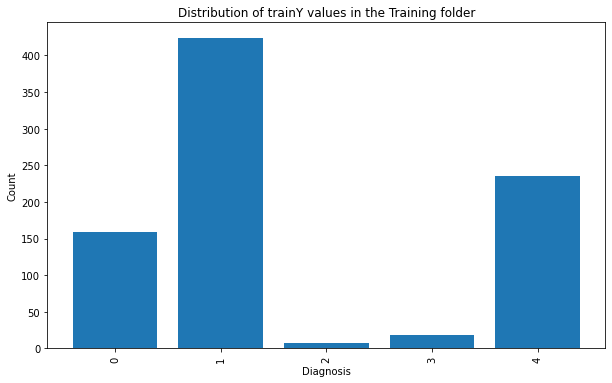

In [90]:
# Graph Distribution
value_counts = pd.Series(trainY_encoded).value_counts()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of trainY values in the Training folder')
plt.xticks(rotation=90)
plt.show()


In [114]:
# Check Shape
unique_shapes = set(arr.shape for arr in trainX)
print(unique_shapes)


{(12, 450)}


In [115]:
# Checking min length to cut files
min_length = float('inf')

for arr in trainX:
    if arr.shape[1] < min_length:
        min_length = arr.shape[1]

print(f"The minimum length of the y dimension in trainX is {min_length}")


The minimum length of the y dimension in trainX is 450


In [158]:
#cut files to a length of 450 samples
for i in range(len(trainX)):
    trainX[i] = trainX[i][:, :450]


In [132]:
# Print the number of classes
num_classes = len(np.unique(trainY))
print("Number of classes in trainY:", num_classes)
trainY_encoded = to_categorical(label_encoder.fit_transform(trainY))


Number of classes in trainY: 5


In [134]:
# Assuming trainY is your label array
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)
trainY_encoded = to_categorical(trainY_encoded, num_classes=5)

# Create the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(12, 450), return_sequences=True))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(32, activation='softmax'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(5, activation='softmax'))

# Compile the model
lstm_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
        tf.keras.metrics.Recall(name='Recall'),
        tf.keras.metrics.Precision(name='Precision'),
        tf.keras.metrics.AUC(
            num_thresholds=200,
            curve="ROC",
            summation_method="interpolation",
            name="AUC",
            dtype=None,
            thresholds=None,
            multi_label=True,
            label_weights=None,
        )
    ]
)

# Fit the model
history = lstm_model.fit(trainX, trainY_encoded, epochs=200, batch_size=32)


Epoch 1/200
27/27 [==============================] - 2s 12ms/step - loss: 1.5874 - accuracy: 0.3302 - Recall: 0.0000e+00 - Precision: 0.0000e+00 - AUC: 0.4888
Epoch 2/200
27/27 [==============================] - 0s 14ms/step - loss: 1.4882 - accuracy: 0.5053 - Recall: 0.0000e+00 - Precision: 0.0000e+00 - AUC: 0.5130
Epoch 3/200
27/27 [==============================] - 0s 12ms/step - loss: 1.4264 - accuracy: 0.5030 - Recall: 0.0000e+00 - Precision: 0.0000e+00 - AUC: 0.5320
Epoch 4/200
27/27 [==============================] - 0s 12ms/step - loss: 1.3892 - accuracy: 0.5112 - Recall: 0.0000e+00 - Precision: 0.0000e+00 - AUC: 0.5944
Epoch 5/200
27/27 [==============================] - 0s 12ms/step - loss: 1.3667 - accuracy: 0.5385 - Recall: 0.0000e+00 - Precision: 0.0000e+00 - AUC: 0.5921
Epoch 6/200
27/27 [==============================] - 0s 11ms/step - loss: 1.3088 - accuracy: 0.5562 - Recall: 0.0000e+00 - Precision: 0.0000e+00 - AUC: 0.6046
Epoch 7/200
27/27 [===========================

In [2]:
lstm_model.summary()

NameError: name 'lstm_model' is not defined

In [143]:
# Change model to testfolder
train_folder = "/Users/evanxiang/Desktop/ML Testing/TestFolder"
train_files = [file_name for file_name in os.listdir(train_folder) if file_name.endswith(".mat")]
label_files = [file_name for file_name in os.listdir(train_folder) if file_name.endswith(".hea")]

testX = []
testY = []

for file_name in train_files:
    file_path = os.path.join(train_folder, file_name)
    mat = sio.loadmat(file_path)
    data = mat['val']
    testX.append(data)

csv_file_path = "/Users/evanxiang/Desktop/ML Testing/SNOMED_mappings_unscored.csv"
try:
    with open(csv_file_path, 'r') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader)
        for row in reader:
            snomed_code = row[1].strip('"')
            disorder_names = [name.strip() for name in row[0].split(',')]
            for disorder_name in disorder_names:
                snomed_dict[snomed_code] = disorder_name
except FileNotFoundError:
    print(f"Error: CSV file '{csv_file_path}' not found.")

for file_name in label_files:
    if file_name.endswith(".hea"):
        file_path = os.path.join(train_folder, file_name)
        with open(file_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                if line.startswith("#Dx:"):
                    diagnosis = line.strip().split(":")[1].strip()
                    testY.append(diagnosis)

label_encoder = LabelEncoder()
testY_encoded = label_encoder.fit_transform(testY)
print(testX[0])
print(testY_encoded[0])


[[-0.58013483 -0.74915907 -0.53503043 ... -0.01998137 -0.02932458
  -0.00610387]
 [-0.27379453 -0.31180235 -0.23241689 ... -0.17021087 -0.12613594
  -0.01105434]
 [ 0.4497055   0.61100984  0.42919758 ... -0.09130916 -0.05267238
  -0.00096641]
 ...
 [-0.21639868 -0.26098592 -0.19695309 ... -0.12711098 -0.11512655
  -0.05024854]
 [-0.39361357 -0.50811939 -0.36950586 ... -0.13210568 -0.11147539
  -0.05093244]
 [-0.51104702 -0.67956632 -0.49354477 ... -0.11548466 -0.08905701
  -0.0265477 ]]
0


In [146]:
# Test test folder
print(len(testX))
print(len(testY_encoded))
print(testY_encoded[0:11])
unique_shapes = set(arr.shape for arr in testX)
print(unique_shapes)
min_length = float('inf')
for arr in testX:
    if arr.shape[1] < min_length:
        min_length = arr.shape[1]

print(f"The minimum length of the y dimension in trainX is {min_length}")



212
212
[0 1 1 1 4 1 1 0 1 1 1]
{(12, 2884), (12, 2222), (12, 2106), (12, 2411), (12, 550), (12, 1450), (12, 611), (12, 1929), (12, 800), (12, 2600), (12, 1200), (12, 773), (12, 3500), (12, 632), (12, 571), (12, 1050), (12, 2972), (12, 635), (12, 940), (12, 1300), (12, 400), (12, 708), (12, 647), (12, 650), (12, 717), (12, 900), (12, 598), (12, 787), (12, 1673), (12, 1513), (12, 1150), (12, 1754), (12, 1400), (12, 500), (12, 2114), (12, 750), (12, 2422), (12, 689), (12, 2187), (12, 582), (12, 701), (12, 1000), (12, 1725), (12, 1543), (12, 1250), (12, 1607), (12, 594), (12, 1854), (12, 707), (12, 600), (12, 1619), (12, 1811), (12, 850), (12, 1750), (12, 615), (12, 783), (12, 1927), (12, 499), (12, 2363), (12, 682), (12, 2656), (12, 1100), (12, 2427), (12, 1350), (12, 450), (12, 874), (12, 1353), (12, 758), (12, 700), (12, 1600), (12, 706), (12, 770), (12, 648), (12, 1740), (12, 779)}
The minimum length of the y dimension in trainX is 400


In [149]:
# Change the testing folder to 400 length
for i in range(len(testX)):
    testX[i] = trainX[i][:, :400]


In [163]:
# Predict labels
print("Original shape of first sequence in testX:", testX[0].shape)
testX_features_adjusted = [np.pad(seq, ((0, 0), (0, max(0, 450 - seq.shape[1]))), 'constant')[:450] if seq.shape[1] != 450 else seq for seq in testX]
testX_time_adjusted = pad_sequences(testX_features_adjusted, maxlen=12, padding='post', dtype='float32', value=0.0)
print("Adjusted shape of testX:", testX_time_adjusted.shape)
testY_pred = lstm_model.predict(testX_time_adjusted)

Original shape of first sequence in testX: (12, 400)
Adjusted shape of testX: (212, 12, 450)
7/7 [==============================] - 0s 4ms/step


In [1]:
print(testY_pred[0])

NameError: name 'testY_pred' is not defined

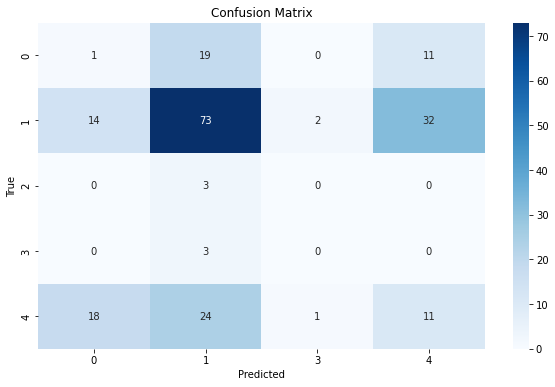

In [166]:
# generate a heatmap
confusion_matrix = pd.crosstab(testY_encoded, np.argmax(testY_pred, axis=1), rownames=['True'], colnames=['Predicted'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
